In [2]:
import pymysql
import pandas as pd
from datetime import datetime

In [14]:
## 작업분류 엑셀 E:\project\렌즈\작업일지
conn = pymysql.connect(host='175.212.10.234', user='cgacAdmin', password='gac81-344', db='contactlensEB', charset='utf8',port=3307)
cursor = conn.cursor()
target_date = '2023-09-05'

base_query = f'''
            SELECT filename,lotNum,workDate,testDate,defectInfo,OK,defectstep FROM result
            WHERE DATE(workDate) = '{target_date}'
            '''
cursor.execute(base_query)
b_res = cursor.fetchall()
conn.close()

df = pd.DataFrame(data=b_res, columns=['filename', 'lotNum', 'workDate', 'testDate', 'defectInfo', 'OK', 'defectstep'])


In [16]:
df['workDate'] = pd.to_datetime(df['workDate'])
df
df.set_index('workDate', inplace=True)




workDate
2023-09-05 09:03:00    48
2023-09-05 09:04:00    45
2023-09-05 09:05:00    50
2023-09-05 09:06:00    50
2023-09-05 09:07:00    50
                       ..
2023-09-05 20:25:00     0
2023-09-05 20:26:00     0
2023-09-05 20:27:00    50
2023-09-05 20:28:00    20
2023-09-05 20:29:00     5
Freq: T, Length: 687, dtype: int64

In [21]:
re_df = pd.DataFrame()
re_df['count'] = df.resample('1T').size()
re_df['defect_amount'] = df['OK'].resample('1T').sum()
re_df

,count,defect_amount
workDate,,
2023-09-05 09:03:00,48,31
2023-09-05 09:04:00,45,12
2023-09-05 09:05:00,50,10
2023-09-05 09:06:00,50,10
2023-09-05 09:07:00,50,7
...,...,...
2023-09-05 20:25:00,0,0
2023-09-05 20:26:00,0,0
2023-09-05 20:27:00,50,12


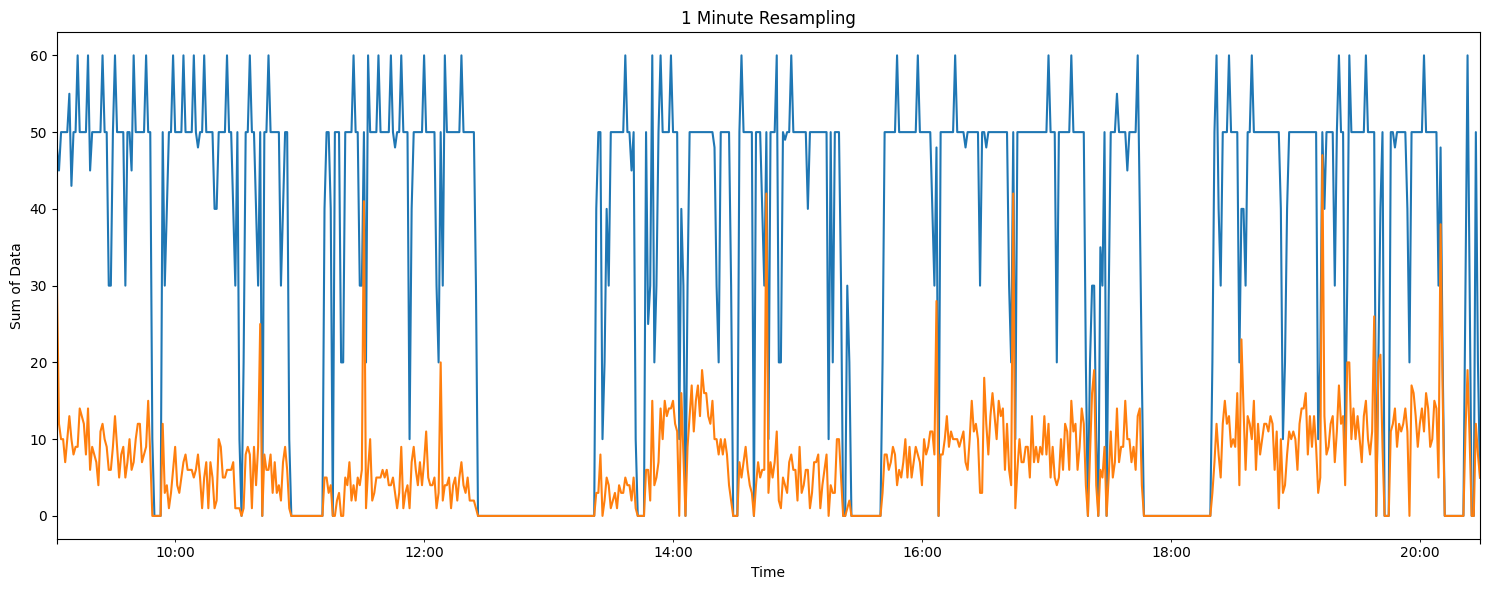

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
re_df['count'].plot(label = 'totla count')
re_df['defect_amount'].plot(label = 'defect_amount')
plt.title('1 Minute Resampling')
plt.xlabel('Time')
plt.ylabel('Sum of Data')
plt.tight_layout()
plt.show()
